In [1]:
from copy import deepcopy
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Load the data
data =pd.read_csv('movie_data.csv')
print(data.shape)
data.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data['director_facebook_likes']
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [13]:
newdata = data.iloc[:, 4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=5)

In [17]:
# clean the data
newdata = newdata.dropna()

In [18]:
kmeans.fit(newdata)

c:\Users\chhantyald\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [23]:
import numpy as np
kmeans.cluster_centers_
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 4651, 1: 68, 2: 87, 3: 102, 4: 11}

In [28]:
newdata['cluster'] = kmeans.labels_


newdata

C:\Users\chhantyald\AppData\Local\Temp\ipykernel_5920\2447287539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['cluster'] = kmeans.labels_


,director_facebook_likes,actor_3_facebook_likes,cluster
0,0.0,855.0,0
1,563.0,1000.0,0
2,0.0,161.0,0
3,22000.0,23000.0,4
5,475.0,530.0,0
...,...,...,...
5037,0.0,133.0,0
5038,2.0,318.0,0
5040,0.0,0.0,0
5041,0.0,489.0,0


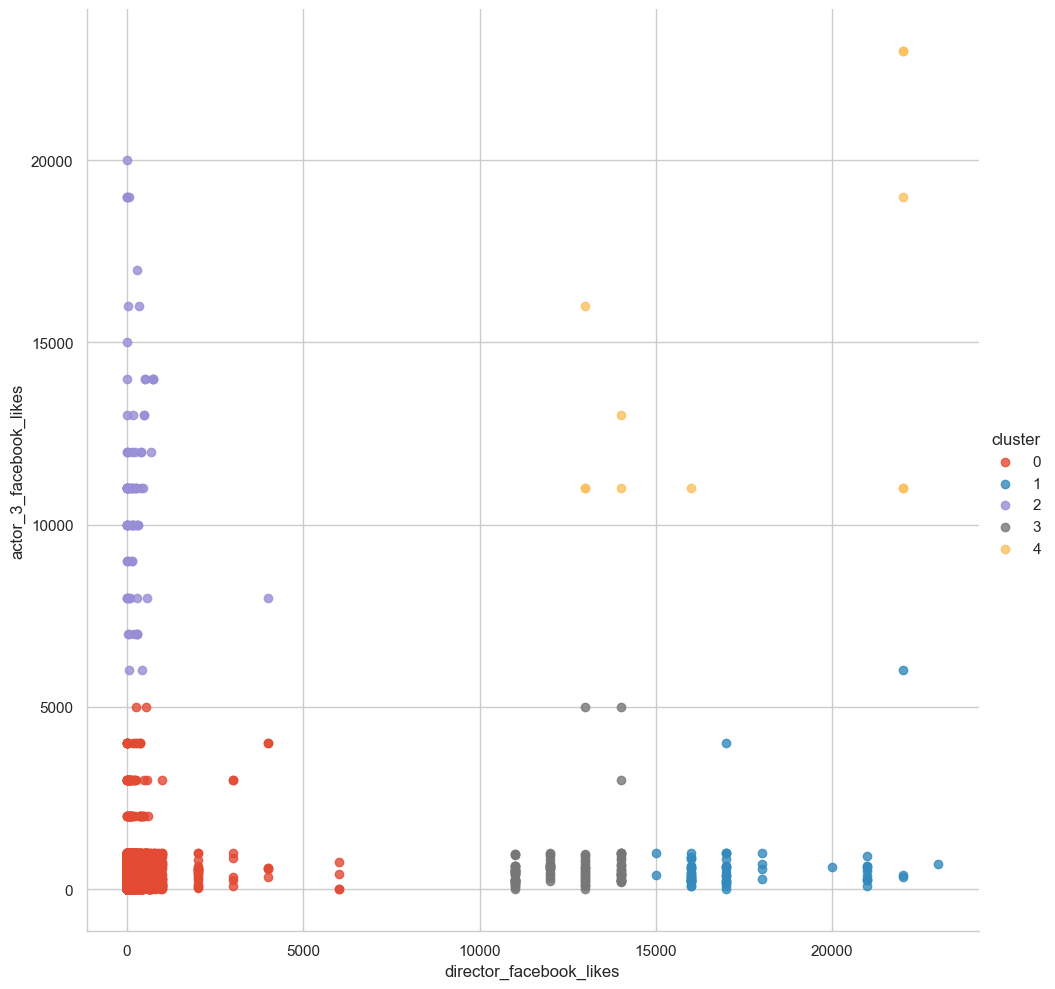

In [34]:
# plot the data

sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes', y='actor_3_facebook_likes', data=newdata, height=10,
           hue='cluster', fit_reg=False
           )
